In [33]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Step 2: Download HTML

In [34]:
url = "https://companies-market-cap-copy.vercel.app/index.html"
response = requests.get(url)


Step 3: Transform the HTML

In [35]:
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")
tables

[<table class="table" style="width:100%">
 <thead>
 <tr>
 <th>Year</th>
 <th>Revenue</th>
 <th>Change</th>
 </tr>
 </thead>
 <tbody>
 <tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">

In [36]:

if tables:
    table = tables[0]  
    rows = table.find_all("tr")

    data_list = []
    for row in rows:
        cols = row.find_all("td")
        cols = [col.text.strip() for col in cols]
        if cols:
            data_list.append(cols)

df

,Year,Revenue,Change
15,2009,0.11,NaN
14,2010,0.11,4.29
13,2011,0.20,74.95
12,2012,0.41,102.34
11,2013,2.01,387.23
10,2014,3.19,58.85
9,2015,4.04,26.50
8,2016,7.00,73.01
7,2017,11.75,67.98
6,2018,21.46,82.51


Step 4: Process the DataFrame

In [37]:
df = pd.DataFrame(data_list, columns = ["Year", "Revenue" ,"Change"])

df = df.sort_values("Year")

df["Revenue"] = df["Revenue"].str.replace('[$B]', '', regex = True)
df["Revenue"] = pd.to_numeric(df["Revenue"])

df["Change"] = df["Change"].str.replace('[%]', '', regex = True)
df["Change"] = pd.to_numeric(df["Change"])

'''df = df.dropna(subset=["Year"])
df = df.dropna(subset=["Revenue"])
df = df.dropna(subset=["Change"])'''

df.to_csv("tesla_data.csv", index = False)

print(df)

    Year  Revenue  Change
15  2009     0.11     NaN
14  2010     0.11    4.29
13  2011     0.20   74.95
12  2012     0.41  102.34
11  2013     2.01  387.23
10  2014     3.19   58.85
9   2015     4.04   26.50
8   2016     7.00   73.01
7   2017    11.75   67.98
6   2018    21.46   82.51
5   2019    24.57   14.52
4   2020    31.53   28.31
3   2021    53.82   70.67
2   2022    81.46   51.35
1   2023    96.77   18.80
0   2024    97.15    0.39


Step 5: Store the data in sqlite

In [38]:
conn = sqlite3.connect('tesla_data.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS revenue (
               year TEXT,
               revenue REAL,
               change REAL
               )
''')

for num, row in df.iterrows():
    cursor.execute("INSERT INTO revenue (year, revenue, change) VALUES (?, ?, ?)", (row["Year"], row["Revenue"], row["Change"]))

conn.commit()
conn.close()

Step 6: Visualize the data

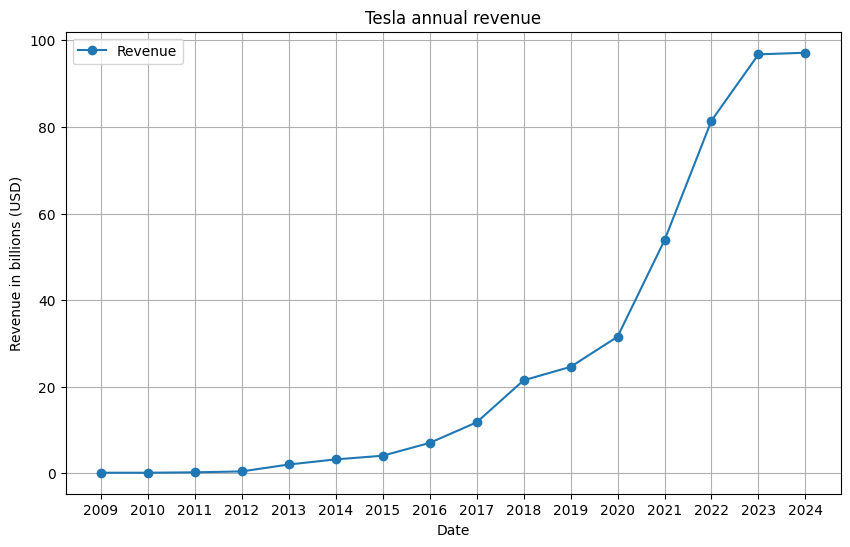

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Revenue"], marker = "o", label = "Revenue")
plt.title("Tesla annual revenue")
plt.xlabel("Date")
plt.ylabel("Revenue in billions (USD)")
plt.legend()
plt.grid(True)

plt.savefig("revenue.png")
plt.show()